# Bayesian Functional Overlapping Clusters

## Single Stochasic Process

Let $X(t)$ be a realization from a stochastic process evaluated at time $t \in \mathcal{T}$ with $\mathbb{E}\{X(t)\} = m(t)$ and $Cov\{X(t),X(s)\} = C(t,s)$. Assuming $X \in L^2$ (square-integrable function), we can use the Karhunen-Loève Theorem to get the following:

$$X(t) = m(t) + \sum_{k=1}^\infty Z_k e_k(t)$$

where $Z_k = \int_a^b Y_i(t) e_k(t) dt$ and $e_k(t)$ is an eigenvector corresponding to the eigenvalue $\lambda_k$. We know that $\mathbb{E}(Z_k) = 0$ and $Cov(Z_i, Z_j) = \delta_{i=j}\lambda_j$.

Assume that $\lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_M \ge \dots$. We can then approximate $X(t)$ using a truncated Karhunen-Loève expansion (note, this approximation will mimize the mean square error):

$$X(t) \approx m(t) + \sum_{k=1}^M Z_k e_k(t)$$

Let $\chi_k = \frac{1}{\sqrt{\lambda_k}}\int_a^b Y_i(t) e_k(t) dt = \frac{1}{\sqrt{\lambda_k}}Z_k$. Thus we can rewrite our truncated KL expansion as 

$$X(t) \approx m(t) + \sum_{k=1}^M \sqrt{\lambda_k}\chi_k e_k(t)$$
where $\chi_k \sim \mathcal{N}(0,1)$. Let $\psi_k(t) = \sqrt{\lambda_k}e_k(t)$. Thus, we have

$$X(t) \approx m(t) + \sum_{k=1}^M \chi_k \psi_k(t)$$

We can approximate $m(t)$ and $\psi_k(t)$ by using a basis expansion. Let $\mathbf{S}(t) \in \mathbb{R}^p$ be a vector of basis functions evaluated at time $t$. Thus we have

$$X(t) \approx \mathbf{S}(t)'\boldsymbol{\nu} + \sum_{k=1}^M \chi_k \mathbf{S}(t)'\boldsymbol{\phi}_k = S(t)'\boldsymbol{\nu} + S(t)'\boldsymbol{\Phi}\boldsymbol{\chi}$$

Using this framework, we have that $\mathbb{E}\{X(t)\} = S(t)'\boldsymbol{\nu}$ and $Cov\{X(t), X(s)\} = S(t)'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(s)$. Due to the normality of $\chi_k$, we have that $X(.) \sim GP\left(S(t)'\boldsymbol{\nu},  S(t)'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(s)\right)$.



## Overlapping Clusters

Consider the model
$$Y_i(t) = f_i(t) + \epsilon_i(t)$$
Where $\epsilon_i(t) \sim \mathcal{N}(\mathbf{0}, \sigma_\epsilon^2\mathbf{I})$.

We will first start with defining a mixture model for clustering on $f_i(.)$(as in Heller and Ghahramani (2007))

$$P(f_i(.)|\boldsymbol{\Theta}) = \sum_{l=1}^K \pi_l GP\left(f_i(.)|S(t)'\boldsymbol{\nu}_l, S(t)'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(s)\right)$$

Let $\mathbf{t}_{obs}= \{t_1, t_2, \dots, t_{\tilde{n}}\}$ be the observed time points of the function. Thus we have
$$p(f_i(\mathbf{t}_{obs})|\boldsymbol{\Theta}) = \sum_{l=1}^K \pi_l \mathcal{N}\left(f_i(\mathbf{t}_{obs})|S(\mathbf{t}_{obs})'\boldsymbol{\nu}_l, S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs})\right)$$


where $\sum_{l=1}^K \pi_l = 1$ and $S(\mathbf{t}_{obs}) = [S(t_1), \dots, S(t_{\tilde{n}})] \in \mathbb{R}^{p \times n}$. Let $\mathbf{z}_i$ be a binary vector such that $\sum_{l=1}^K z_{il} = 1$ and $z_{il} \in \{0,1\}$. Let $$p(z_{il} = 1| \boldsymbol{\Theta}) = \pi_l = \prod_{l=1}^K \pi_j^{z_{il}}$$
Thus we have
$$ p(f_i(\mathbf{t}_{obs})|\mathbf{z}_i, \boldsymbol{\Theta}) = \prod_{l=1}^K \mathcal{N}\left(f_i(\mathbf{t}_{obs})|S(\mathbf{t}_{obs})'\boldsymbol{\nu}_l, S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs})\right)^{z_{il}}$$


Let $dim(\mathbf{t}_{obs}) = \tilde{n}$. One thing to note is that $S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs})$ is a singular matrix if $q >p$ (which it often is). We will note that the covariance matrix is positive semi-definite. Thus the square root exists. Thus we can define the following density for the degenerate gaussian random variable, which is defined over the following subspace $\{\mu + \boldsymbol{\Sigma}^{1/2}\mathbf{v}:\mathbf{v} \in \mathbb{R}^q\}$
$$(det^*(2\pi\boldsymbol{\Sigma}))^{(-1/2)}exp\{-(1/2) (\mathbf{x} - \boldsymbol{\mu})'\boldsymbol{\Sigma}^+(\mathbf{x} - \boldsymbol{\mu})\}$$
where $det^*(.)$ is the product of all non-zero eigenvalues.

We will now remove the restriction that $\sum_{l=1}^kz_{il} = 1$. We can see that $$p(f_i(\mathbf{t}_{obs})|\mathbf{z}_i, \boldsymbol{\Theta}) \propto \prod_{l = 1}^K exp\left\{-\frac{z_{il}}{2}\left[f_i(\mathbf{t}_{obs}) - S(\mathbf{t}_{obs})\boldsymbol{\nu}_l\right]'\left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs})\right]^{+}\left[f_i(\mathbf{t}_{obs}) - S(\mathbf{t}_{obs})\boldsymbol{\nu}_l\right] \right\}$$

 $$\propto exp \left\{- \frac{1}{2} f_i(\mathbf{t}_{obs})'\left(\sum_{l=1}^K z_{il}\left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs})\right]^{+} \right)f_i(\mathbf{t}_{obs}) - 2f_i(\mathbf{t}_{obs}) \left[\sum_{l=1}^K \left(z_{il}\left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs})\right]^{+}S(\mathbf{t}_{obs})\boldsymbol{\nu}_l \right) \right] \right\}$$

Let $\mathbf{M}^{+}_i = \sum_{l=1}^K z_{il}\left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs})\right]^{+}$ and $\mathbf{m}_i = \sum_{l=1}^K \left(z_{il}\left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs})\right]^{+}S(\mathbf{t}_{obs})\boldsymbol{\nu}_l \right)$.

Thus we can see that $f_i(\mathbf{t}_{obs}) \sim \mathcal{N}(\mathbf{M}_i\mathbf{m}_i, \mathbf{M}_i)$.

## Inference for Unobserved Time Points

Let $\mathbf{t}^* = [t_1, \dots, t_g]$ be a set of unobserved time points such that $t_i \in \mathcal{T},\; i = 1, \dots, g$. Suppose we want to find $p(f_i(\mathbf{t}^*)|f_i(\mathbf{t}_{obs}))$. We know that
$$p\left(\begin{bmatrix}
f_i(\mathbf{t}_{obs}) \\
f_i(\mathbf{t}^*)
\end{bmatrix}| \mathbf{z}_i, \boldsymbol{\Theta}\right) \propto  \prod_{l = 1}^K exp\left\{-\frac{z_{il}}{2}\begin{bmatrix}
(f_i(\mathbf{t}_{obs}) - S(\mathbf{t}_{obs})\boldsymbol{\nu}_l)' & (f_i(\mathbf{t}^*) - S(\mathbf{t}^*)\boldsymbol{\nu}_l)'\\
\end{bmatrix}\begin{bmatrix}
S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs}) & S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}^*) \\
S(\mathbf{t}^*)'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs}) & S(\mathbf{t}^*)'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}^*)
\end{bmatrix}^{+}\begin{bmatrix}
f_i(\mathbf{t}_{obs}) - S(\mathbf{t}_{obs})\boldsymbol{\nu}_l\\
f_i(\mathbf{t}^*) - S(\mathbf{t}^*)\boldsymbol{\nu}_l
\end{bmatrix}\right\}$$

Let 
$$\begin{bmatrix}
S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs}) & S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}^*) \\
S(\mathbf{t}^*)'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs}) & S(\mathbf{t}^*)'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}^*)
\end{bmatrix}^{+} = \begin{bmatrix}
\mathbf{A}_l & \mathbf{B}_l \\
\mathbf{C}_l & \mathbf{D}_l
\end{bmatrix}^{+}$$

Using the result from Matrix Algebra - Theory, Computations, and Applications in Statistics by James E. Gentle (2007), we have the following result:
$$ \begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}^{+} = \begin{bmatrix}
\mathbf{A}^+ + (\mathbf{A}^+\mathbf{B}\mathbf{Z}^+\mathbf{C}\mathbf{A}^+) & -\mathbf{A}^+\mathbf{B}\mathbf{Z}^+\\
-\mathbf{Z}^+\mathbf{C}\mathbf{A}^+ & \mathbf{Z}^+
\end{bmatrix}$$ 
where
$$\mathbf{Z} = \mathbf{D} - \mathbf{C}\mathbf{A}^+\mathbf{B}$$
We can see that $-\mathbf{A}^+\mathbf{B}\mathbf{Z}^+ = \left(-\mathbf{Z}^+\mathbf{C}\mathbf{A}^+ \right)'$ if we use the Moore-Penrose inverse for $\mathbf{Z}^+$ and $\mathbf{A}^+$.

Thus, we have
$$p\left(\begin{bmatrix}
f_i(\mathbf{t}_{obs}) \\
f_i(\mathbf{t}^*)
\end{bmatrix}| \mathbf{z}_i, \boldsymbol{\Theta}\right) \propto  \prod_{l = 1}^K exp\left\{-\frac{z_{il}}{2}\begin{bmatrix}
(f_i(\mathbf{t}_{obs}) - S(\mathbf{t}_{obs})\boldsymbol{\nu}_l)' & (f_i(\mathbf{t}^*) - S(\mathbf{t}^*)\boldsymbol{\nu}_l)'\\
\end{bmatrix}\begin{bmatrix}
\mathbf{A}_l^+ + (\mathbf{A}^+_l\mathbf{B}_l\mathbf{Z}_l^+\mathbf{C}_l\mathbf{A}_l^+) & -\mathbf{A}_l^+\mathbf{B}_l\mathbf{Z}_l^+\\
-\mathbf{Z}_l^+\mathbf{C}_l\mathbf{A}_l^+ & \mathbf{Z}_l^+
\end{bmatrix}\begin{bmatrix}
f_i(\mathbf{t}_{obs}) - S(\mathbf{t}_{obs})\boldsymbol{\nu}_l\\
f_i(\mathbf{t}^*) - S(\mathbf{t}^*)\boldsymbol{\nu}_l
\end{bmatrix}\right\}$$

$$\propto exp\left\{-2f_i(\mathbf{t}^*)'\left(\sum_{l=1}^K z_{il}\left(\mathbf{Z}_l^+\mathbf{C}_l\mathbf{A}_l^+\right)\right)f_i(\mathbf{t}_{obs}) - 2f_i(\mathbf{t}^*)'\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\mathbf{S}(\mathbf{t}^*)\boldsymbol{\nu}_l\right) + f_i(\mathbf{t}^*)'\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)f_i(\mathbf{t}^*)\right\}$$

$$= exp\left\{f_i(\mathbf{t}^*)'\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)f_i(\mathbf{t}^*) - f_i(\mathbf{t}^*)'\left(\sum_{l =1}^K\left(z_{il}\mathbf{Z}_l^+\left(\mathbf{C}_l\mathbf{A}_l^+f_i(\mathbf{t}_{obs})+ \mathbf{S}(\mathbf{t}^*)\boldsymbol{\nu}_l\right)\right)\right)\right\}$$

Thus let $\tilde{\mathbf{M}}_i^+ = \sum_{l=1}^K z_{il}\mathbf{Z}_l^+$ and $\tilde{\mathbf{m}}_i = \sum_{l =1}^K\left(z_{il}\mathbf{Z}_l^+\left(\mathbf{C}_l\mathbf{A}_l^+f_i(\mathbf{t}_{obs})+ \mathbf{S}(\mathbf{t}^*)\boldsymbol{\nu}_l\right)\right)$.
Thus we can see that 
$$f_i(\mathbf{t}^*)|f_i(\mathbf{t}_{obs}), \mathbf{z}_i, \boldsymbol{\Theta} \sim \mathcal{N}(\tilde{\mathbf{M}}_i\tilde{\mathbf{m}}_i, \tilde{\mathbf{M}}_i)$$

## Inference

So far, we have the following:

$$\left[y_i(\mathbf{t}^*), f_i(\mathbf{t}^*), f_i(\mathbf{t}_{obs}), \boldsymbol{\Theta}|y_i(\mathbf{t}_{obs}) \right] \propto \left[\boldsymbol{\Theta}\right] \times \left[f_i(\mathbf{t}_{obs})|\boldsymbol{\Theta}\right] \times \left[y_i(\mathbf{t}_{obs})| f_i(\mathbf{t}_{obs}), \boldsymbol{\Theta}\right]\times \left[f_i(\mathbf{t}^*)|f_i(\mathbf{t}_{obs}), \boldsymbol{\Theta}\right] \times \left[y_i(\mathbf{t}^*)|f_i(\mathbf{t}^*), \boldsymbol{\Theta}\right]$$

We know that
$$\left[f_i(\mathbf{t}_{obs})| \boldsymbol{\Theta}\right] = \mathcal{N}\left(\mathbf{Mm}, \mathbf{M}\right); \;\;\; i = 1, \dots, N$$
$$\left[y_i(\mathbf{t}_{obs})| f_i(\mathbf{t}_{obs}), \boldsymbol{\Theta}\right] = \mathcal{N}\left(f_i(\mathbf{t}_{obs}), \sigma^2_\epsilon \mathbf{I}\right); \;\;\; i = 1,\dots, N$$
$$\left[f_i(\mathbf{t}^*)|f_i(\mathbf{t}_{obs}), \boldsymbol{\Theta}\right] = \mathcal{N}\left(\mathbf{\tilde{M}\tilde{m}}, \mathbf{\tilde{M}}\right); \;\;\; i = 1, \dots, N$$
$$\left[y_i(\mathbf{t}^*)|f_i(\mathbf{t}^*), \boldsymbol{\Theta}\right] = \mathcal{N}\left(f_i(\mathbf{t}^*),  \sigma^2_\epsilon \mathbf{I}\right); \;\;\; i =1,\dots, N$$

Thus we are left with just defining the priors on $\boldsymbol{\Theta} = \{ \boldsymbol{\nu}_1,\dots, \boldsymbol{\nu}_K, \boldsymbol{\Phi}_1,\dots, \boldsymbol{\Phi}_K, \sigma^2_\epsilon, \tau^2_1, \dots, \tau^2_K, \mathbf{Z}\}$. We can start with some standard priors for $\sigma^2_\epsilon$ and $\boldsymbol{\nu}_1,\dots, \boldsymbol{\nu}_K$.
$$\left[\sigma^2_\epsilon\right] = IG(a_0, b_0)$$
$$\left[\boldsymbol{\nu}_l|\tau^2_l \right] \propto exp\left(-\frac{1}{2\tau_l^2}\boldsymbol{\nu}_l'\mathbf{P}\boldsymbol{\nu}_l\right); \;\;\; l = 1,\dots, K$$
$$\left[\tau^2_l \right] = IG(a_1,b_1); \;\;\; l = 1,\dots, K$$
where $\mathbf{P}= \begin{bmatrix}
1 & -1 & 0 &  & \\
-1 & 2 & -1 &  &  \\
 & \ddots & \ddots & \ddots&  \\
 &  & -1 & 2 & -1  \\
 &  &  & -1 & 1 \\
\end{bmatrix}$

Bayesian Estimation of Principal Components for Functional Data 

-Seems to put a prior on $\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l'$. Since $\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l' \in \mathbb{R}^{P \times P}$ ($\boldsymbol{\Phi}_l \in \mathbb{R}^{P \times M}$)

From $\textit{Sparse Bayesian infinite factor models}$ (Bhattacharya and Dunson, 2011), we can define a prior of $\boldsymbol{\Phi}_l$. Bhattacharya and Dunson have the following model
$$y_i \sim \mathcal{N}_n(\mathbf{0}, \Omega); \;\;\;\;\; \Omega = \boldsymbol{\Lambda}\boldsymbol{\Lambda}' + \boldsymbol{\Sigma}$$
where $\boldsymbol{\Sigma}$ is a $n \times n$ diagonal matrix with non-negative entries, and $\boldsymbol{\Lambda} \in \mathbb{R}^{p \times h}$. In this case, we will set $\boldsymbol{\Sigma} = \mathbf{0}$, so we are just left with $\Omega = \boldsymbol{\Lambda}\boldsymbol{\Lambda}'$.

We can use the multiplicative gamma process schinkage prior as defined by Bhattacharya and Dunson. Let $\lambda_{jh}$ be the elements in $\boldsymbol{\Lambda}$ ($1 \le j \le P$,  $\;\;1 \le h \le \infty$). Thus we can specify the following as our priors:
$$ \lambda_{jh} | \phi_{jh},\tau_h \sim \mathcal{N}(0, \phi_{jh}^{-1}\tau_h^{-1}), \;\;\;\; \phi_{jh} \sim Gamma(\nu/2, \nu/2), \;\;\; \tau_h = \prod_{l=1}^h \delta_l$$
$$\delta_1 \sim Gamma(a_1, 1), \;\;\; \delta_l = Gamma(a_2, 1)\;\;\; l \ge 2$$

We can approximate $\boldsymbol{\Omega}$ by $\boldsymbol{\Omega}_H = \boldsymbol{\Lambda}_H\boldsymbol{\Lambda}_H'$. Where all of the columns of $\boldsymbol{\lambda}$ from $H+1$ onwards are zero. Theorem 1 in Bhattacharya and Dunson says that the probability of $\boldsymbol{\Omega}_H$ being arbitarily close to $\boldsymbol{\Omega}$ converges to 1 at an exponential rate, so we do not have to worry about the truncation for large enough $H$.


Let $\phi_{(i,j,l)}$ be the $(i,j)^{th}$ element of $\boldsymbol{\Phi}_l$. Thus we have the following:

$$[\phi_{(i,j,l)}|\gamma_{(i,j,l)}, \tilde{\tau}_{j,l}] = \mathcal{N}(0, \gamma_{(i,j,l)}^{-1} \tilde{\tau}_{j,l}^{-1}); \;\;\; i = 1,\dots, P, \;\;\; j = 1, \dots, M,\;\;\; l = 1,\dots, K$$
$$[\gamma_{(i,j,l)}] = Gamma(\nu/2, \nu/2); \;\;\; i = 1,\dots, P, \;\;\; j = 1, \dots, M,\;\;\; l = 1,\dots, K$$
$$\tilde{\tau}_{(j,l)} = \prod_{n=1}^j \delta_{(n,l)}$$
$$[\delta_{(1,l)} ] = Gamma(a_{(1,l)}, 1); \;\;\; l = 1,\dots, K$$
$$[\delta_{(j,l)}] = Gamma(a_{(2,l)}, 1); \;\;\; j = 2, \dots, M \;\;\; l = 1,\dots, K$$
$$[a_{(1,l)}] = Gamma(\alpha_{(1,l)}, \beta_{(1,l)}); \;\;\; l = 1,\dots, K$$
$$[a_{(2,l)}] = Gamma(\alpha_{(2,l)}, \beta_{(2,l)}); \;\;\; l = 1,\dots, K$$

In Dunson, $\alpha_{(i,l)}= 2$, $\beta_{(i,l)} = 1$.


We will start with the case where $k$ is a fixed parameter in the model. Thus we can define a distribution over the binary matrix $\mathbf{Z}$ in a similar fashion to how Griffiths and Ghahramani defined the distribution over a finite binary matrix when deriving the IBP ($\textit{The Indian Buffet Process: An Introduction and Review (Griffiths and Ghahramani 2011)}$).
Thus we will have the following distribution over $\mathbf{Z} \in \mathbb{R}^{N \times K}$
$$[z_{il}|\pi_l] = Bernoulli(\pi_l) \;\; i = 1,\dots, N \;\; l = 1, \dots, K$$
$$[\pi_l] = Beta(\alpha/K, 1)\;\; l = 1, \dots, K$$

The following DAG will help show how all the parameters are related.


In [1]:
%load_ext tikzmagic

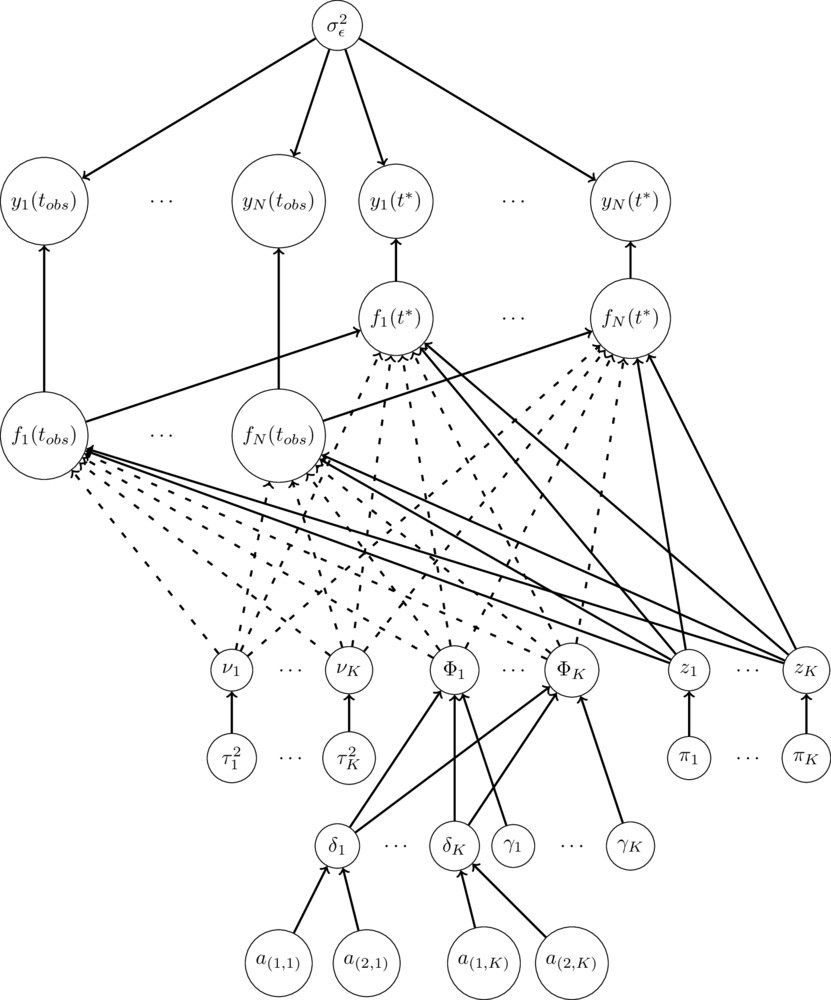

In [89]:
%%tikz -s 1000,1000
\node[shape=circle,draw=black] (1) at (0,0) {$y_1(t_{obs})$};
\node (2) at (2,0) {$\ldots$};
\node[shape=circle,draw=black] (3) at (4,0) {$y_N(t_{obs})$};
\node[shape=circle,draw=black] (4) at (6,0) {$y_1(t^*)$};
\node (5) at (8,0) {$\ldots$};
\node[shape=circle,draw=black] (6) at (10,0) {$y_N(t^*)$};
\node[shape=circle,draw=black] (7) at (0,-4) {$f_1(t_{obs})$};
\node (8) at (2,-4) {$\ldots$};
\node[shape=circle,draw=black] (9) at (4,-4) {$f_N(t_{obs})$};
\node[shape=circle,draw=black] (10) at (6,-2) {$f_1(t^*)$};
\node (11) at (8,-2) {$\ldots$};
\node[shape=circle,draw=black] (12) at (10,-2) {$f_N(t^*)$};
\node[shape=circle,draw=black] (13) at (5, 3) {$\sigma^2_{\epsilon}$};
\node[shape=circle,draw=black] (14) at (3.2,-8) {$\nu_1$};
\node (15) at (4.2,-8) {$\ldots$};
\node[shape=circle,draw=black] (16) at (5.2,-8) {$\nu_K$};
\node[shape=circle,draw=black] (17) at (7,-8) {$\Phi_1$};
\node (18) at (8,-8) {$\ldots$};
\node[shape=circle,draw=black] (19) at (9,-8) {$\Phi_K$};
\node[shape=circle,draw=black] (20) at (11,-8) {$z_1$};
\node (21) at (12,-8) {$\ldots$};
\node[shape=circle,draw=black] (22) at (13,-8) {$z_K$};
\node[shape=circle,draw=black] (23) at (3.2,-9.5) {$\tau^2_1$};
\node (24) at (4.2,-9.5) {$\ldots$};
\node[shape=circle,draw=black] (25) at (5.2,-9.5) {$\tau^2_K$};
\node[shape=circle,draw=black] (26) at (5,-11) {$\delta_1$};
\node (27) at (6,-11) {$\ldots$};
\node[shape=circle,draw=black] (28) at (7,-11) {$\delta_K$};
\node[shape=circle,draw=black] (29) at (8,-11) {$\gamma_1$};
\node (30) at (9,-11) {$\ldots$};
\node[shape=circle,draw=black] (31) at (10,-11) {$\gamma_K$};
\node[shape=circle,draw=black] (35) at (11,-9.5) {$\pi_1$};
\node (36) at (12,-9.5) {$\ldots$};
\node[shape=circle,draw=black] (37) at (13,-9.5) {$\pi_K$};
\node[shape=circle,draw=black] (38) at (4,-13) {$a_{(1,1)}$};
\node[shape=circle,draw=black] (39) at (5.5,-13) {$a_{(2,1)}$};
\node[shape=circle,draw=black] (40) at (7.5,-13) {$a_{(1,K)}$};
\node[shape=circle,draw=black] (41) at (9,-13) {$a_{(2,K)}$};


\path [->, line width=1pt] (7) edge node[left] {} (1);
\path [->, line width=1pt] (9) edge node[left] {} (3);
\path [->, line width=1pt] (10) edge node[left] {} (4);
\path [->, line width=1pt] (12) edge node[left] {} (6);
\path [->, line width=1pt] (13) edge node[left] {} (1);
\path [->, line width=1pt] (13) edge node[left] {} (3);
\path [->, line width=1pt] (13) edge node[left] {} (4);
\path [->, line width=1pt] (13) edge node[left] {} (6);
\path [->, line width=1pt] (7) edge node[left] {} (10);
\path [->, line width=1pt] (9) edge node[left] {} (12);
\path [->, line width=1pt, loosely dashed] (14) edge node[left] {} (7);
\path [->, line width=1pt, loosely dashed] (14) edge node[left] {} (9);
\path [->, line width=1pt, loosely dashed] (14) edge node[left] {} (10);
\path [->, line width=1pt, loosely dashed] (14) edge node[left] {} (12);
\path [->, line width=1pt, loosely dashed] (16) edge node[left] {} (7);
\path [->, line width=1pt, loosely dashed] (16) edge node[left] {} (9);
\path [->, line width=1pt, loosely dashed] (16) edge node[left] {} (10);
\path [->, line width=1pt, loosely dashed] (16) edge node[left] {} (12);
\path [->, line width=1pt, loosely dashed] (17) edge node[left] {} (7);
\path [->, line width=1pt, loosely dashed] (17) edge node[left] {} (9);
\path [->, line width=1pt, loosely dashed] (17) edge node[left] {} (10);
\path [->, line width=1pt, loosely dashed] (17) edge node[left] {} (12);
\path [->, line width=1pt, loosely dashed] (19) edge node[left] {} (7);
\path [->, line width=1pt, loosely dashed] (19) edge node[left] {} (9);
\path [->, line width=1pt, loosely dashed] (19) edge node[left] {} (10);
\path [->, line width=1pt, loosely dashed] (19) edge node[left] {} (12);
\path [->, line width=1pt] (20) edge node[left] {} (7);
\path [->, line width=1pt] (20) edge node[left] {} (9);
\path [->, line width=1pt] (20) edge node[left] {} (10);
\path [->, line width=1pt] (20) edge node[left] {} (12);
\path [->, line width=1pt] (22) edge node[left] {} (7);
\path [->, line width=1pt] (22) edge node[left] {} (9);
\path [->, line width=1pt] (22) edge node[left] {} (10);
\path [->, line width=1pt] (22) edge node[left] {} (12);
\path [->, line width=1pt] (23) edge node[left] {} (14);
\path [->, line width=1pt] (25) edge node[left] {} (16);
\path [->, line width=1pt] (26) edge node[left] {} (17);
\path [->, line width=1pt] (28) edge node[left] {} (19);
\path [->, line width=1pt] (28) edge node[left] {} (17);
\path [->, line width=1pt] (29) edge node[left] {} (17);
\path [->, line width=1pt] (31) edge node[left] {} (19);
\path [->, line width=1pt] (26) edge node[left] {} (19);
\path [->, line width=1pt] (35) edge node[left] {} (20);
\path [->, line width=1pt] (37) edge node[left] {} (22);
\path [->, line width=1pt] (38) edge node[left] {} (26);
\path [->, line width=1pt] (39) edge node[left] {} (26);
\path [->, line width=1pt] (40) edge node[left] {} (28);
\path [->, line width=1pt] (41) edge node[left] {} (28);

The dotted lines in the graph above represent connections that depend on $\mathbf{z}_i$. For example, the connection between $\boldsymbol{\nu}_1$ and $f_1(t_{obs})$ exists if $z_{1,1} =1$. Also the parameter $\boldsymbol{\gamma}_l \in \mathbb{R}^{P \times M}$ with elements $\gamma_{i,j,l}$ and $\boldsymbol{\delta}_j \in \mathbb{R}^M$ with elements $\boldsymbol{\delta}_{i,j}$.

### Posterior Distributions


Let $\boldsymbol{\zeta}$ be the collection of all the random variables in this model, and let $\boldsymbol{\zeta}_{-\theta}$ be the collection of all random variables in the model minus $\theta$. Thus we have

$$\sigma_{\epsilon}^2|\boldsymbol{\zeta}_{-\sigma_{\epsilon}^2} = \sigma_{\epsilon}^2|y_1(\mathbf{t}_{obs}), \dots, y_N(\mathbf{t}_{obs}), y_1(\mathbf{t}^*), \dots, y_N(\mathbf{t}^*), f_1(\mathbf{t}_{obs}), \dots, f_N(\mathbf{t}_{obs}), f_1(\mathbf{t}^*), \dots, f_N(\mathbf{t}^*)$$
$$ \propto (\sigma^2_\epsilon)^{- a_0 -1} exp\left\{-\frac{b_0}{\sigma^2_\epsilon}\right\}\prod_{i=1}^N (2\pi\sigma^2_\epsilon)^{\tilde{n}/2} exp\left\{-\frac{1}{2\sigma^2_\epsilon}||y_i(\mathbf{t}_{obs}) - f_i(\mathbf{t}_{obs})||^2_2\right\}(2\pi\sigma^2_\epsilon)^{g/2} exp\left\{-\frac{1}{2\sigma^2_\epsilon}||y_i(\mathbf{t}^*). - f_i(\mathbf{t}^*)||^2_2 \right\}$$
$$\propto (\sigma^2_\epsilon)^{-(a_0 + \frac{1}{2}(N\tilde{n} + Ng)) -1} exp\left\{-\frac{b_0 + \frac{1}{2}\sum_{i=1}^N\left(||y_i(\mathbf{t}_{obs}) - f_i(\mathbf{t}_{obs})||^2_2 + ||y_i(\mathbf{t}^*). - f_i(\mathbf{t}^*)||^2_2\right)}{\sigma^2_\epsilon} \right\}$$
Thus we have
$$\sigma_{\epsilon}^2|\boldsymbol{\zeta}_{-\sigma_{\epsilon}^2} \sim IG\left(a_0 + \frac{1}{2}(N\tilde{n} + Ng), b_0 + \frac{1}{2}\sum_{i=1}^N\left(||y_i(\mathbf{t}_{obs}) - f_i(\mathbf{t}_{obs})||^2_2 + ||y_i(\mathbf{t}^*). - f_i(\mathbf{t}^*)||^2_2\right)\right)$$

***

$$f_i(\mathbf{t}_{obs})| \boldsymbol{\zeta}_{-f_i(\mathbf{t}_{obs})} = f_i(\mathbf{t}_{obs})|y_i(\mathbf{t}_{obs}), f_i(\mathbf{t}^*),\mathbf{z}_1, \dots, \mathbf{z}_K, \boldsymbol{\phi}_1, \dots, \boldsymbol{\phi}_K, \boldsymbol{\nu}_1, \dots, \boldsymbol{\nu}_K, \sigma^2_\epsilon; \;\;\; i = 1, \dots, K$$
$$\begin{aligned}
\propto & exp\left\{-\frac{1}{2}\left(f_i(\mathbf{t}_{obs}) - \mathbf{M}_i\mathbf{m}_i\right)'\mathbf{M}^{+}_i\left(f_i(\mathbf{t}_{obs}) - \mathbf{M}_i\mathbf{m}_i\right)\right\} \\
& \times exp\left\{-\frac{1}{2}\left(f_i(\mathbf{t}^*) - \left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)^+\left(\sum_{l =1}^K\left(z_{il}\mathbf{Z}_l^+\left(\mathbf{C}_l\mathbf{A}_l^+f_i(\mathbf{t}_{obs})+ \mathbf{S}(\mathbf{t}^*)'\boldsymbol{\nu}_l\right)\right)\right)\right)'\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)\left(f_i(\mathbf{t}^*) - \left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)^+\left(\sum_{l =1}^K\left(z_{il}\mathbf{Z}_l^+\left(\mathbf{C}_l\mathbf{A}_l^+f_i(\mathbf{t}_{obs})+ \mathbf{S}(\mathbf{t}^*)'\boldsymbol{\nu}_l\right)\right)\right)\right) \right\}\\
& \times exp\left\{-\frac{1}{2\sigma^2_\epsilon}(y_i(\mathbf{t}_{obs}) - f_i(\mathbf{t}_{obs}))'(y_i(\mathbf{t}_{obs}) - f_i(\mathbf{t}_{obs})) \right\}
\end{aligned}$$

$$\begin{aligned}
\propto exp\left\{-\frac{1}{2}\left[ f_i(\mathbf{t}_{obs})' \left(\mathbf{M}^+_i + \left(\sum_{l = 1}^K z_{il}\mathbf{Z}^+_l \mathbf{C}_l\mathbf{A}_l^+\right)'\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)^+ \left(\sum_{l = 1}^K z_{il}\mathbf{Z}^+_l \mathbf{C}_l\mathbf{A}_l^+\right) + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{\tilde{n}}\right) f_i(\mathbf{t}_{obs})\\
- 2f_i(\mathbf{t}_{obs})'\left(\frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}_{obs}) + \left(\sum_{l = 1}^K z_{il}\mathbf{Z}^+_l \mathbf{C}_l\mathbf{A}_l^+\right)'\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)^+\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)  f_i(\mathbf{t}^*) + \mathbf{M}_i^+\mathbf{M}_i\mathbf{m}_i\right)\right]\right\}
\end{aligned}$$

The above is true because $$\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)'\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)^+ \left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right) = \left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)^+ \left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right) = \left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)$$
Since $\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)^+$ is symmetric (covariance matrix), we know that $\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)$ is symmetric.

Let $$\mathbf{W}_i = \left(\mathbf{M}^+_i + \left(\sum_{l = 1}^K z_{il}\mathbf{Z}^+_l \mathbf{C}_l\mathbf{A}_l^+\right)'\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)^+ \left(\sum_{l = 1}^K z_{il}\mathbf{Z}^+_l \mathbf{C}_l\mathbf{A}_l^+\right) + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{\tilde{n}}\right)^+$$
and
$$\mathbf{w}_i = \frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}_{obs}) + \left(\sum_{l = 1}^K z_{il}\mathbf{Z}^+_l \mathbf{C}_l\mathbf{A}_l^+\right)'\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)^+\left(\sum_{l=1}^K z_{il}\mathbf{Z}_l^+\right)  f_i(\mathbf{t}^*) + \mathbf{M}_i^+\mathbf{M}_i\mathbf{m}_i$$

Thus we have 
$$f_i(\mathbf{t}_{obs})| \boldsymbol{\zeta}_{-f_i(\mathbf{t}_{obs})} \sim \mathcal{N}(\mathbf{W}_i \mathbf{w}_i, \mathbf{W}_i); \;\;\; i = 1, \dots, K$$

***

$$f_i(\mathbf{t}^*)| \boldsymbol{\zeta}_{-f_i(\mathbf{t}^*)} = f_i(\mathbf{t}^*)|y_i(\mathbf{t}^*), f_i(\mathbf{t}), \mathbf{z}_1, \dots, \mathbf{z}_K, \boldsymbol{\phi}_1, \dots, \boldsymbol{\phi}_K, \boldsymbol{\nu}_1, \dots, \boldsymbol{\nu}_K,\sigma^2_\epsilon$$

$$\propto exp\left\{-\frac{1}{2}\left(f_i(\mathbf{t}^*) - \tilde{\mathbf{M}}_i\tilde{\mathbf{m}}_i\right)'\tilde{\mathbf{M}}^{+}_i\left(f_i(\mathbf{t}^*) - \tilde{\mathbf{M}}_i\tilde{\mathbf{m}}_i\right)\right\} exp\left\{-\frac{1}{2\sigma^2_\epsilon}(y_i(\mathbf{t}^*) - f_i(\mathbf{t}^*))'(y_i(\mathbf{t}^*) - f_i(\mathbf{t}^*)) \right\}$$ 



$$\propto exp\left\{-\frac{1}{2}\left[ f_i(\mathbf{t}^*)' \left(\tilde{\mathbf{M}}^+_i  + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{g}\right) f_i(\mathbf{t}^*)
- 2f_i(\mathbf{t}^*)'\left(\frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}^*) + \tilde{\mathbf{M}}_i^+\tilde{\mathbf{M}}_i\tilde{\mathbf{m}}_i\right)\right]\right\}$$

Let
$$\tilde{\mathbf{W}}_i = \left(\tilde{\mathbf{M}}^+_i + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{g}\right)^+$$

and
$$\tilde{\mathbf{w}}_i = \frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}^*) + \tilde{\mathbf{M}}_i^+\tilde{\mathbf{M}}_i\tilde{\mathbf{m}}_i$$

Thus we have that 
$$f_i(\mathbf{t}^*)| \boldsymbol{\zeta}_{-f_i(\mathbf{t}^*)} \sim \mathcal{N}(\tilde{\mathbf{W}}_i\tilde{\mathbf{w}}_i, \tilde{\mathbf{W}}_i); \;\;\; i = 1, \dots, K$$

***

$$\boldsymbol{\nu}_i| \boldsymbol{\zeta}_{-\boldsymbol{\nu}_i} = \boldsymbol{\nu}_i|f_1(\mathbf{t}_{obs}), \dots, f_N(\mathbf{t}_{obs}), f_1(\mathbf{t}^*),\dots, f_N(\mathbf{t}^*), \tau_i^2, \boldsymbol{\phi}_1, \dots, \boldsymbol{\phi}_K, \mathbf{z}_1, \dots, \mathbf{z}_k; \;\;\; i = 1, \dots, K$$

$$\begin{aligned}
\propto & exp\left\{-\frac{1}{2\tau_i^2}\boldsymbol{\nu}_i'\mathbf{P}\boldsymbol{\nu}_i \right\}\\
&\times \prod_{j=1}^N exp\left\{-\frac{1}{2}\left(f_j(\mathbf{t}_{obs}) - \mathbf{M}_j\sum_{l=1}^K \left(z_{jl}\left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs})\right]^{+}S(\mathbf{t}_{obs})\boldsymbol{\nu}_l \right)\right)' \mathbf{M}_j^+\left(f_j(\mathbf{t}_{obs}) - \mathbf{M}_j\sum_{l=1}^K \left(z_{jl}\left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_l\boldsymbol{\Phi}_l')S(\mathbf{t}_{obs})\right]^{+}S(\mathbf{t}_{obs})\boldsymbol{\nu}_l \right)\right) \right\}\\
&\times \prod_{j=1}^N exp\left\{-\frac{1}{2}\left(f_j(\mathbf{t}^*) - \tilde{\mathbf{M}}_j \sum_{l =1}^K\left(z_{jl}\mathbf{Z}_l^+\left(\mathbf{C}_l\mathbf{A}_l^+f_j(\mathbf{t}_{obs})+ \mathbf{S}(\mathbf{t}^*)\boldsymbol{\nu}_l\right)\right)\right)' \tilde{\mathbf{M}}_j^+\left(f_j(\mathbf{t}^*) - \tilde{\mathbf{M}}_j \sum_{l =1}^K\left(z_{jl}\mathbf{Z}_l^+\left(\mathbf{C}_l\mathbf{A}_l^+f_j(\mathbf{t}_{obs})+ \mathbf{S}(\mathbf{t}^*)\boldsymbol{\nu}_l\right)\right)\right)  \right\}
\end{aligned}$$

$$\begin{aligned}
\propto exp\left\{-\frac{1}{2}\boldsymbol{\nu}_i'\left(\frac{1}{\tau_i^2}\mathbf{P} + \sum_{j=1}^N \left[S(\mathbf{t}_{obs})' \left( \left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_i\boldsymbol{\Phi}_i')S(\mathbf{t}_{obs})\right]^{+}\right)'\left( z_{ji}\mathbf{M}_j\right)\left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_i\boldsymbol{\Phi}_i')S(\mathbf{t}_{obs})\right]^{+}S(\mathbf{t}_{obs})\right] + \sum_{j=1}^N \left[S(\mathbf{t}^*)'(\mathbf{Z}_i^+)'\left(z_{ji}\tilde{\mathbf{M}}_j\right)\mathbf{Z}_i^+ S(\mathbf{t}^*)\right]\right) \boldsymbol{\nu}_i \\
+ \boldsymbol{\nu}_i'\left( \sum_{j=1}^N \left[S(\mathbf{t}_{obs})' \left( \left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_i\boldsymbol{\Phi}_i')S(\mathbf{t}_{obs})\right]^{+}\right)'\left( z_{ji}\mathbf{M}_j\right)\mathbf{M}_j^+f_j(\mathbf{t}_{obs})\right]  + \sum_{j = 1}^N \left[S(\mathbf{t}^*)'(\mathbf{Z}_i^+)'\left(z_{ji}\tilde{\mathbf{M}}_j\right)\tilde{\mathbf{M}}_j^+ f_j(\mathbf{t}^*) \right]\right)  \right\}
\end{aligned}$$

Let $$\mathbf{B}_i = \left(\frac{1}{\tau_i^2}\mathbf{P} + \sum_{j=1}^N \left[S(\mathbf{t}_{obs})' \left( \left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_i\boldsymbol{\Phi}_i')S(\mathbf{t}_{obs})\right]^{+}\right)'\left( z_{ji}\mathbf{M}_j\right)\left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_i\boldsymbol{\Phi}_i')S(\mathbf{t}_{obs})\right]^{+}S(\mathbf{t}_{obs})\right] + \sum_{j=1}^N \left[S(\mathbf{t}^*)'(\mathbf{Z}_i^+)'\left(z_{ji}\tilde{\mathbf{M}}_j\right)\mathbf{Z}_i^+ S(\mathbf{t}^*)\right]\right)^+$$

and 
$$\mathbf{b}_i =  \sum_{j=1}^N \left[S(\mathbf{t}_{obs})' \left( \left[S(\mathbf{t}_{obs})'(\boldsymbol{\Phi}_i\boldsymbol{\Phi}_i')S(\mathbf{t}_{obs})\right]^{+}\right)'\left( z_{ji}\mathbf{M}_j\right)\mathbf{M}_j^+f_j(\mathbf{t}_{obs})\right]  + \sum_{j = 1}^N \left[S(\mathbf{t}^*)'(\mathbf{Z}_i^+)'\left(z_{ji}\tilde{\mathbf{M}}_j\right)\tilde{\mathbf{M}}_j^+ f_j(\mathbf{t}^*) \right]$$

Thus we have that $$\boldsymbol{\nu}_i| \boldsymbol{\zeta}_{-\boldsymbol{\nu}_i} \sim \mathcal{N}(\mathbf{B}_i \mathbf{b}_i, \mathbf{B}_i) ; \;\;\; i = 1, \dots, K$$

***

$$\tau^2_i| \boldsymbol{\zeta}_{-\tau^2_i} = \tau^2_i | \boldsymbol{\nu}_i; \;\;\; i = 1, \dots, K$$

$$\propto (\tau^2_i)^{(-a_1 - 1)} exp\left\{-\frac{b_0}{\tau^2_i}\right\} (2\pi\tau^2_i)^{(-P/2)}exp\left\{-\frac{1}{2\tau^2_i}\boldsymbol{\nu}_i'\mathbf{P}\boldsymbol{\nu}_i \right\}$$

$$\propto (\tau^2_i)^{-(a_1 + P/2) - 1} exp\left\{- \frac{b_0 + \frac{1}{2}\boldsymbol{\nu}_i'\mathbf{P}\boldsymbol{\nu}_i}{\tau_i^2}\right\}$$

Thus we have that 
$$\tau^2_i| \boldsymbol{\zeta}_{-\tau^2_i} \sim IG\left(a_1 + P/2, b_0 + \frac{1}{2}\boldsymbol{\nu}_i'\mathbf{P} \boldsymbol{\nu}_i \right); \;\;\; i = 1, \dots, K$$

***

$$\phi_{(i,j,l)}| \boldsymbol{\zeta}_{-\phi_{(i,j,l)}} = \phi_{(i,j,l)} | \delta_{1,l}, \dots, \delta_{j,l}, \gamma_{(i,j,l)}, f_1(\mathbf{t}_{obs}), \dots, f_N(\mathbf{t}_{obs}), f_1(\mathbf{t}^*), \dots, f_N(\mathbf{t}^*), \mathbf{z}_1, \dots, \mathbf{z}_K, \boldsymbol{\nu}_1, \dots, \boldsymbol{\nu}_K; \;\;\; i = 1,\dots, P, \;\;\; j = 1, \dots, M,\;\;\; l = 1,\dots, K $$

Due to the complexity of this distribution, we will use a Metropolis-Hastings step. Let $\phi_{(i,j,l)}'$ be the proposed new value, and $\boldsymbol{\phi}_l'$ be the updated matrix (only the $(i,j,l)$ element is updated). Thus we have that 

$$\begin{aligned}
P(\phi_{(i,j,l)}| \boldsymbol{\zeta}_{-\phi_{(i,j,l)}}) \propto exp\left\{-\frac{\gamma_{(i,j,l)} \tilde{\tau}_{(j,l)}}{2}  \phi_{(i,j,l)}^2\right\} \prod_{j=1}^N det^*(\mathbf{M}_j)^{-1/2} exp\left\{-\frac{1}{2}\left(f_j(\mathbf{t}_{obs}) - \mathbf{M}_j\mathbf{m}_j\right)'\mathbf{M}_j^+\left(f_j(\mathbf{t}_{obs}) - \mathbf{M}_j\mathbf{m}_j\right) \right\}\\
\times \prod_{j=1}^N det^*(\tilde{\mathbf{M}}_j)^{-1/2} exp\left\{-\frac{1}{2}\left(f_j(\mathbf{t}^*) - \tilde{\mathbf{M}}_j\tilde{\mathbf{m}}_j\right)'\tilde{\mathbf{M}}_j^+\left(f_j(\mathbf{t}^*) - \tilde{\mathbf{M}}_j\tilde{\mathbf{m}}_j\right) \right\}\\
\end{aligned}$$

Consider the proposal distribution $Q\left(\phi_{(i,j,l)}'|\phi_{(i,j,l)}\right) = \mathcal{N}\left(\phi_{(i,j,l)}' | \mu = \phi_{(i,j,l)}, \sigma^2 = \alpha \gamma_{(i,j,l)}^{-1} \tilde{\tau}_{(j,l)}^{-1}\right)$ for some small $\alpha >0$. Thus our probability of accepting any step is 
$$A(\phi_{(i,j,l)}',\phi_{(i,j,l)}) = \min \left\{1, \frac{P\left(\phi_{(i,j,l)}'| \boldsymbol{\zeta}_{-\phi_{(i,j,l)}'}\right)}{P\left(\phi_{(i,j,l)}| \boldsymbol{\zeta}_{-\phi_{(i,j,l)}}\right)} \frac{Q\left(\phi_{(i,j,l)}|\phi_{(i,j,l)}'\right)}{Q\left(\phi_{(i,j,l)}'|\phi_{(i,j,l)}\right)}\right\}$$

***

$$\delta_{(i,j)}| \boldsymbol{\zeta}_{-\delta_{(i,j)}} = \delta_{i,j} | \delta_{(1,j)}, \dots, \delta_{(i-1,j)}, \boldsymbol{\phi}_{(:,i,j)}, \dots, \boldsymbol{\phi}_{(:,M,j)}, \boldsymbol{\gamma}_{(:,i,j)}, \dots, \boldsymbol{\gamma}_{(:,M,j)}, a_{(1,j)}, a_{(2,j)} \;\;\; i = 1, \dots, M  \;\;\; j = 1, \dots, K$$

where $\boldsymbol{\phi}_{(:,i,j)} = \{\boldsymbol{\phi}_{(k,i,j)}| 1\le k \le P \}$ and $\boldsymbol{\gamma}_{(:,i,j)} = \{\boldsymbol{\gamma}_{(:,i,j)}| 1\le k \le P \}$

$$P(\delta_{(1,j)}| \boldsymbol{\zeta}_{-\delta_i}) \propto \delta_{(1,j)}^{a_1 -1}exp\left\{-\delta_{(1,j)}\right\} \prod_{k=1}^P \prod_{m = 1}^M \left(\gamma_{(k,1,j)}\prod_{n=1}^m\delta_{(n,j)}\right)^{1/2} exp\left\{ -\frac{\gamma_{(k,m,j)}\prod_{n=1}^m\delta_{(n,j)}}{2}\phi_{(k,1,j)}^2\right\}$$

$$\propto \delta_{(1,j)}^{(a_{(1,j)} + PM/2) -1} exp\left\{-\delta_{(1,j)}\left(1 + \frac{1}{2}\sum_{k=1}^P\gamma_{(k,1,j)} \phi^2_{(k,1,j)} + \frac{1}{2}\sum_{m=2}^M\sum_{k=1}^P\gamma_{(k,m,j)} \left(\prod_{n=2}^m \delta_{(n,j)}\right)\phi^2_{(k,m,j)}\right)\right\}$$

Therefore, we have
$$ \delta_{(1,j)}| \boldsymbol{\zeta}_{-\delta_{(1,j)}} \sim Gamma\left(a_{(1,j)} + PM/2, 1 + \frac{1}{2}\sum_{k=1}^P\gamma_{(k,1,j)} \phi^2_{(k,1,j)} + \frac{1}{2}\sum_{m=2}^M\sum_{k=1}^P\gamma_{(k,m,j)} \left(\prod_{n=2}^m \delta_{(n,j)}\right)\phi^2_{(k,m,j)}\right)$$

$$P(\delta_{(i,j)}| \boldsymbol{\zeta}_{-\delta_i}) \propto \delta_{(i,j)}^{a_2 -1}exp\left\{-\delta_{(i,j)}\right\} \prod_{k=1}^P \prod_{m = i}^M \left(\gamma_{(k,1,j)}\prod_{n=1}^m\delta_{(n,j)}\right)^{1/2} exp\left\{ -\frac{\gamma_{(k,m,j)}\prod_{n=1}^m\delta_{(n,j)}}{2}\phi_{(k,1,j)}^2\right\}; \;\;\; 2 \le i \le M$$

$$\propto \delta_{(i,j)}^{(a_{(2,j)} + P(M-i+1)/2) -1} exp\left\{-\delta_{(i,j)}\left(1 + \frac{1}{2}\sum_{m=i}^M\sum_{k=1}^P\gamma_{(k,m,j)} \left(\prod_{n=1,n \ne i}^m \delta_{(n,j)}\right)\phi^2_{(k,m,j)}\right)\right\}$$

Therefore, we have
$$ \delta_{(i,j)}| \boldsymbol{\zeta}_{-\delta_{(i,j)}} \sim Gamma\left(a_{(2,j)} + P(M-i+1)/2, 1 + \frac{1}{2}\sum_{m=i}^M\sum_{k=1}^P\gamma_{(k,m,j)} \left(\prod_{n=1,n \ne i}^m \delta_{(n,j)}\right)\phi^2_{(k,m,j)}\right); \;\;\; 2 \le i \le M$$

***

$$a_{(1 ,j)}| \boldsymbol{\zeta}_{-a_{(1,j)}} = a_{(1,j)} | \delta_{(1,j)}; \;\;\; j = 1, \dots, K$$


$$P(a_{(1,j)}|\delta_{(1,j)}) \propto \frac{1}{\Gamma(a_{(1,j)})}\delta_{(1,j)}^{a_{(1,j)} -1} a_{(1,j)}^{\alpha_{(1,j)} -1} exp \left\{-a_{(1,j)}\beta_{(1,j)} \right\}$$

Since this is not a known kernal of a distribution, we will have to use Metropolis-Hastings algorithm. Consider the proposal distribution $Q(a_{(1,j)}', a_{(1,j)}) = \mathcal{N}\left(a_{(1,j)}, \alpha^*\beta_{(1,j)}, 0, + \infty\right)$ (Truncated Normal) for some small $\alpha^* > 0$. Thus the probability of accepting any step is

$$A(a_{(1,j)}',a_{(1,j)}) = \min \left\{1, \frac{P\left(a_{(1,j)}'| \boldsymbol{\zeta}_{-a_{(1,j)}'}\right)}{P\left(a_{(1,j)}| \boldsymbol{\zeta}_{-a_{(1,j)}}\right)} \frac{Q\left(a_{(1,j)}|a_{(1,j)}'\right)}{Q\left(a_{(1,j)}'|a_{(1,j)}\right)}\right\}$$

***

$$a_{(2 ,j)}| \boldsymbol{\zeta}_{-a_{(2,j)}} = a_{(2,j)} | \delta_{(2,j)}, \dots, \delta_{(M,j)}; \;\;\; j = 1, \dots, K$$

$$P(a_{(1,j)}|\delta_{(1,j)}) \propto \frac{1}{\Gamma(a_{(2,j)})^{M-1}}\left(\prod_{i=2}^M\delta_{(i,j)}^{a_{(2,j)} -1}\right) a_{(2,j)}^{\alpha_{(2,j)} -1} exp \left\{-a_{(2,j)}\beta_{(2,j)} \right\}$$

Since this is not a known kernal of a distribution, we will have to use Metropolis-Hastings algorithm. Consider the proposal distribution $Q(a_{(2,j)}', a_{(2,j)}) = \mathcal{N}\left(a_{(2,j)}, \epsilon\beta_{(2,j)}, 0, + \infty\right)$ (Truncated Normal) for some small $\epsilon > 0$. Thus the probability of accepting any step is

$$A(a_{(2,j)}',a_{(2,j)}) = \min \left\{1, \frac{P\left(a_{(2,j)}'| \boldsymbol{\zeta}_{-a_{(2,j)}'}\right)}{P\left(a_{(2,j)}| \boldsymbol{\zeta}_{-a_{(2,j)}}\right)} \frac{Q\left(a_{(2,j)}|a_{(2,j)}'\right)}{Q\left(a_{(2,j)}'|a_{(2,j)}\right)}\right\}$$

***

$$\gamma_{(i,j,l)}| \boldsymbol{\zeta}_{-\gamma_{(i,j,l)}} = \gamma_{(i,j,k)} | \phi_{(i,j,l)}, \delta_{(1,l)}, \dots, \delta_{(j,l)}; \;\;\; i = 1, \dots, P;\;\;\; j= 1, \dots, M; \;\;\; l = 1, \dots, K\;\;$$

$$P(\gamma_{(i,j,l)}| \boldsymbol{\zeta}_{-\gamma_{(i,j,l)}}) \propto \left(\gamma_{(i,j,l)}\prod_{m=1}^j\delta_{(m,l)}\right)^{1/2} exp\left\{-\frac{\gamma_{(i,j,l)}\prod_{m=1}^j\delta_{(m,l)}}{2} \phi_{(i,j,l)}^2 \right\} \gamma_{(i,j,l)}^{\nu/2 - 1}exp\left\{-\gamma_{(i,j,l)}\nu/2 \right\}$$ 

$$\propto \gamma_{(i,j,l)}^{( (\nu + 1)/2) -1} exp\left\{-\gamma_{(i,j,l)}\left( \frac{\nu + \prod_{m=1}^j \delta_{(m,l)}\phi^2_{(i,j,l)}}{2}\right)\right\}$$

Thus we have that
$$\gamma_{(i,j,l)}| \boldsymbol{\zeta}_{-\gamma_{(i,j,l)}}\sim Gamma\left(\frac{\nu + 1}{2}, \frac{\nu + \prod_{m=1}^j \delta_{(m,l)}\phi^2_{(i,j,l)}}{2}\right)$$

***

$$z_{(i,l)}| \boldsymbol{\zeta}_{-z_{(i,l)}} = z_{(i,l)} | f_i(\mathbf{t}_{obs}), f_i(\mathbf{t}^*), \pi_l; \;\;\; i = 1, \dots, N; \;\;\; l = 1, \dots, K$$

$$\begin{aligned}
P(z_{(i,l)}| \boldsymbol{\zeta}_{-z_{(i,l)}}) & \propto det^*(\mathbf{M})^{-1/2} exp\left\{-\frac{1}{2}\left(f_i(\mathbf{t}_{obs}) - \mathbf{M}_i\mathbf{m}_i\right)'\mathbf{M}_i^+\left(f_i(\mathbf{t}_{obs}) - \mathbf{M}_i\mathbf{m}_i\right)\right\}det^*(\tilde{\mathbf{M}})^{-1/2} exp\left\{-\frac{1}{2}\left(f_i(\mathbf{t}^*) - \tilde{\mathbf{M}}_i\tilde{\mathbf{m}}_i\right)'\tilde{\mathbf{M}}_i^+\left(f_i(\mathbf{t}^*) - \tilde{\mathbf{M}}_i\tilde{\mathbf{m}}_i\right)\right\}\\
& \times \pi_l^{z_{(i,l)}}(1-\pi)^{1 - z_{(i,l)}}\\
\end{aligned}$$

We can see that this is not a known distribution, so we will have to use Metropolis-Hastings algorithm. Let the proposal distribution be $Q(z_{(i,l)}', z_{(i,l)}) = 0.5^{z_{(i,l)}}0.5^{1 - z_{(i,l)}}$ (Bernoulli(0.5)). Thus the probability of accepting any step is:
$$A(z_{(i,l)}',z_{(i,l)}) = \min \left\{1, \frac{P\left(z_{(i,l)}'| \boldsymbol{\zeta}_{-z_{(i,l)}'}\right)}{P\left(z_{(i,l)}| \boldsymbol{\zeta}_{-z_{(i,l)}}\right)} \frac{Q\left(z_{(i,l)}|z_{(i,l)}'\right)}{Q\left(z_{(i,l)}'|z_{(i,l)}\right)}\right\}$$

***

$$\pi_{l}| \boldsymbol{\zeta}_{-\pi_{l}} = \pi_{l} | z_{(1,l)}, \dots, z_{(N,l)}; \;\;\;  l = 1, \dots, K$$

$$P(\pi_{l}| \boldsymbol{\zeta}_{-\pi_{l}}) \propto \prod_{i=1}^N \left[\left(\pi_l\right)^{z_{il}}\left(1 - \pi_l\right)^{1 - z_{il}}\right]  (\pi_l)^{\alpha/K -1}$$

$$ \propto \left(\pi_l\right)^{ \left(\alpha/K + \sum_{i=1}^N z_{il}\right) -1} \left(1 - \pi_l\right)^{N - \sum_{i=1}^N z_{il}}$$

$$\pi_{l}| \boldsymbol{\zeta}_{-\pi_{l}}\sim Beta \left(\alpha/K + \sum_{i=1}^N z_{il}, N - \sum_{i=1}^N z_{il} + 1\right)$$